In [172]:
import pandas as pd

Используем показатели акций Apple и ETF Vanguard S&P 500

In [173]:
apple = pd.read_csv('data/AAPL.csv', sep=';')
apple.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,31/08/20,15:00:00,125.80,126.10,125.36,125.75,133550
1,31/08/20,15:30:00,125.74,126.10,125.21,125.75,268028
2,31/08/20,16:00:00,125.78,126.05,125.30,125.66,267933
3,31/08/20,16:30:00,125.69,128.07,125.02,127.62,1572805
4,31/08/20,17:00:00,127.62,128.50,126.35,128.03,12715466


In [174]:
vanguard = pd.read_csv('data/VANGUARD.csv', sep=';')
vanguard.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,31/08/20,15:00:00,322.66,322.66,322.66,322.66,1
1,31/08/20,15:30:00,322.78,322.78,322.30,322.30,319
2,31/08/20,16:00:00,322.52,322.52,322.26,322.26,276
3,31/08/20,16:30:00,322.20,322.22,321.75,321.96,1654
4,31/08/20,17:00:00,321.88,322.21,321.52,321.62,60049


Преобразуем данные для удобного обращения с ними

In [175]:
vanguard.dtypes

<DATE>      object
<TIME>      object
<OPEN>     float64
<HIGH>     float64
<LOW>      float64
<CLOSE>    float64
<VOL>        int64
dtype: object

In [176]:
vanguard['<DATE>'] = pd.to_datetime(vanguard['<DATE>'])
apple['<DATE>'] = pd.to_datetime(apple['<DATE>'])

Изучим данные

In [177]:
vanguard.iloc[-90:].describe().astype(int)

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
count,90,90,90,90,90
mean,341,341,341,341,8233
std,1,1,1,1,8024
min,338,338,337,338,1
25%,341,341,341,341,306
50%,341,341,341,341,6903
75%,342,342,342,342,12349
max,343,344,343,343,40103


In [178]:
apple.iloc[-90:].describe().astype(int)

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
count,90,90,90,90,90
mean,135,135,134,134,155226
std,1,1,1,1,618379
min,131,132,131,131,30
25%,133,133,133,133,2290
50%,134,135,134,134,22914
75%,135,135,135,135,121759
max,138,138,138,138,4590094


In [179]:
apple_col = apple.columns.to_list()
apple_col

['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']

In [180]:
for line in apple_col:
    print(line, apple[line][3])

<DATE> 2020-08-31 00:00:00
<TIME> 16:30:00
<OPEN> 125.69
<HIGH> 128.07
<LOW> 125.02
<CLOSE> 127.62
<VOL> 1572805


In [181]:
print(apple[apple_col[2]])

0       125.80
1       125.74
2       125.78
3       125.69
4       127.62
         ...  
2681    132.11
2682    132.77
2683    132.99
2684    132.80
2685    132.63
Name: <OPEN>, Length: 2686, dtype: float64


In [182]:
vanguard[vanguard['<OPEN>'] > 200].head(5)

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,2020-08-31,15:00:00,322.66,322.66,322.66,322.66,1
1,2020-08-31,15:30:00,322.78,322.78,322.30,322.30,319
2,2020-08-31,16:00:00,322.52,322.52,322.26,322.26,276
3,2020-08-31,16:30:00,322.20,322.22,321.75,321.96,1654
4,2020-08-31,17:00:00,321.88,322.21,321.52,321.62,60049


In [183]:
price = vanguard.groupby('<OPEN>')
price.mean()

,<HIGH>,<LOW>,<CLOSE>,<VOL>
<OPEN>,,,,
295.78,296.35,295.40,296.30,1674.0
296.33,297.82,295.04,297.24,95957.0
296.55,297.70,296.34,297.62,2002.0
296.60,296.60,295.50,295.90,1431.0
296.75,297.18,296.40,296.82,1263.0
...,...,...,...,...
343.28,343.34,343.28,343.34,244.0
343.45,343.58,343.42,343.58,242.0
343.48,343.51,343.40,343.40,58.0


array([[<AxesSubplot:xlabel='<OPEN>', ylabel='<OPEN>'>,
        <AxesSubplot:xlabel='<HIGH>', ylabel='<OPEN>'>,
        <AxesSubplot:xlabel='<VOL>', ylabel='<OPEN>'>],
       [<AxesSubplot:xlabel='<OPEN>', ylabel='<HIGH>'>,
        <AxesSubplot:xlabel='<HIGH>', ylabel='<HIGH>'>,
        <AxesSubplot:xlabel='<VOL>', ylabel='<HIGH>'>],
       [<AxesSubplot:xlabel='<OPEN>', ylabel='<VOL>'>,
        <AxesSubplot:xlabel='<HIGH>', ylabel='<VOL>'>,
        <AxesSubplot:xlabel='<VOL>', ylabel='<VOL>'>]], dtype=object)

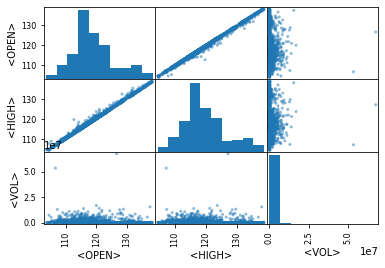

In [184]:
from pandas import plotting

plotting.scatter_matrix(apple[['<OPEN>','<HIGH>', '<VOL>']])

In [185]:
from scipy import stats
stats.ttest_1samp(vanguard['<OPEN>'], 0)

Ttest_1sampResult(statistic=1016.7944323191272, pvalue=0.0)

In [186]:
price_apple = apple['<OPEN>']
price_vw = vanguard['<OPEN>']

In [187]:
stats.ttest_1samp(price_apple, price_vw.mean())

Ttest_1sampResult(statistic=-1527.9379737546863, pvalue=0.0)

In [188]:
import matplotlib.pyplot as plt

Построим графики цены

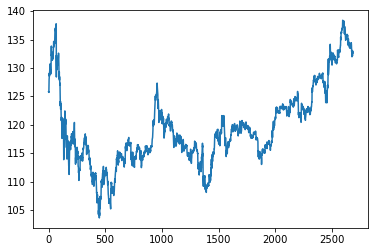

In [189]:
apple['<OPEN>'].plot()
plt.show()

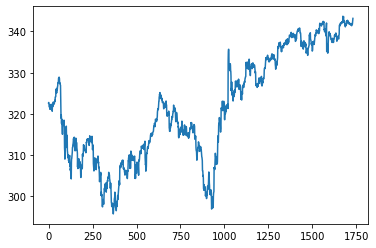

In [190]:
vanguard['<OPEN>'].plot()
plt.show()

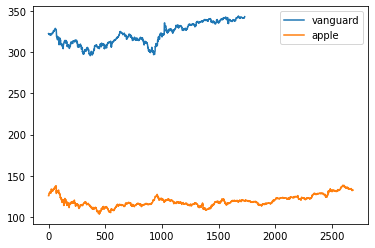

In [191]:
plt.plot(vanguard['<OPEN>'])
plt.plot(apple['<OPEN>'])
plt.legend(["vanguard", "apple"])
plt.show()

Построим график изменения цены

In [192]:
vanguard['<CHANGE, %>'] = vanguard['<CLOSE>'].pct_change()*100
vanguard.head()

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,"<CHANGE, %>"
0,2020-08-31,15:00:00,322.66,322.66,322.66,322.66,1,NaN
1,2020-08-31,15:30:00,322.78,322.78,322.30,322.30,319,-0.111573
2,2020-08-31,16:00:00,322.52,322.52,322.26,322.26,276,-0.012411
3,2020-08-31,16:30:00,322.20,322.22,321.75,321.96,1654,-0.093093
4,2020-08-31,17:00:00,321.88,322.21,321.52,321.62,60049,-0.105603


<AxesSubplot:>

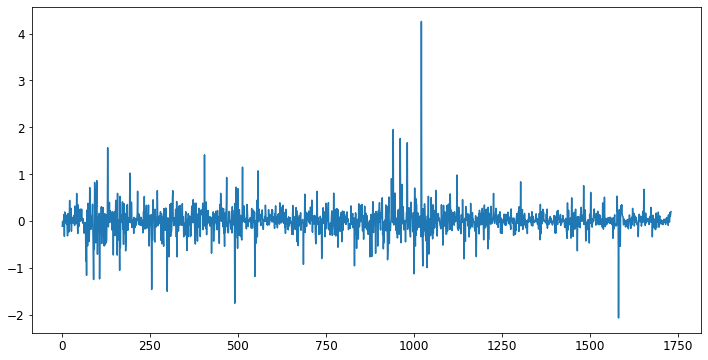

In [193]:
vanguard['<CHANGE, %>'].plot(figsize = (12, 6), fontsize = 12)

Построим график распределения


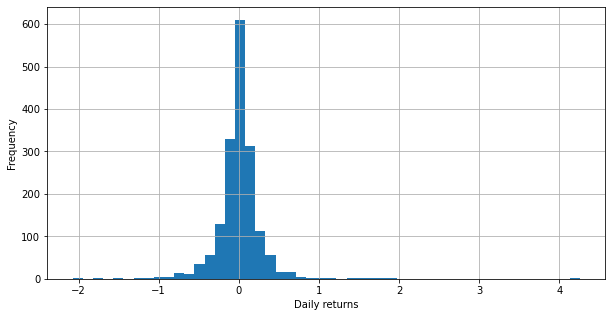

count    1730.000000
mean        0.004074
std         0.283099
min        -2.072811
25%        -0.089082
50%         0.003140
75%         0.110007
max         4.257438
Name: <CHANGE, %>, dtype: float64

In [194]:
vanguard['<CHANGE, %>'].hist(bins = 50, figsize = (10,5))
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
vanguard['<CHANGE, %>'].describe()

Построим график 10 дневной скользящей средней

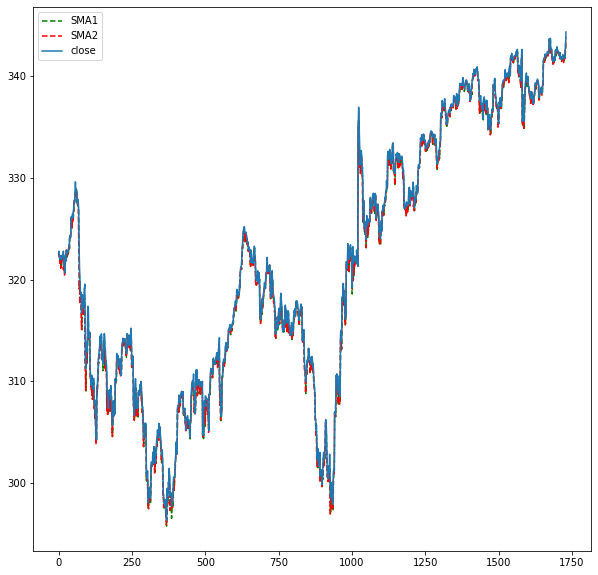

In [195]:
plt.figure(figsize=(10,10))
plt.plot(vanguard['<OPEN>'], 'g--', label="SMA1")
plt.plot(vanguard['<CLOSE>'], 'r--', label="SMA2")
plt.plot(vanguard['<HIGH>'], label="close")
plt.legend()
plt.show()

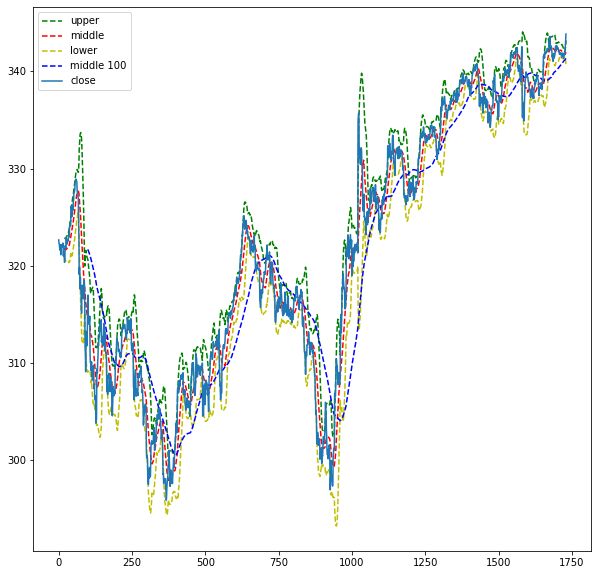

In [198]:
vanguard['middle_band'] = vanguard['<CLOSE>'].rolling(window=20).mean()
vanguard['middle_band_100'] = vanguard['<CLOSE>'].rolling(window=100).mean()
vanguard['upper_band'] = vanguard['<CLOSE>'].rolling(window=20).mean() + vanguard['<CLOSE>'].rolling(window=20).std()*2
vanguard['lower_band'] = vanguard['<CLOSE>'].rolling(window=20).mean() - vanguard['<CLOSE>'].rolling(window=20).std()*2
plt.figure(figsize=(10,10))
plt.plot(vanguard['upper_band'], 'g--', label="upper")
plt.plot(vanguard['middle_band'], 'r--', label="middle")
plt.plot(vanguard['lower_band'], 'y--', label="lower")
plt.plot(vanguard['middle_band_100'], 'b--', label="middle 100")
plt.plot(vanguard['<CLOSE>'], label="close")
plt.legend()
plt.show()

Изучим и сравним возвраты

In [203]:
import numpy as np

apple_returns = np.log(apple['<OPEN>'] / apple['<OPEN>'].shift(1)).dropna()
vanguard_returns = np.log(vanguard['<OPEN>'] / vanguard['<OPEN>'].shift(1)).dropna()
vanguard_returns.head()

1    0.000372
2   -0.000806
3   -0.000993
4   -0.000994
5   -0.000777
Name: <OPEN>, dtype: float64

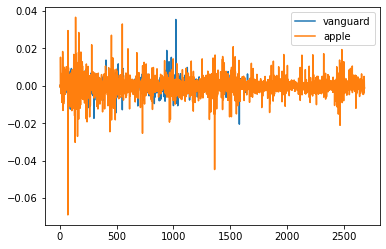

In [205]:
plt.plot(vanguard_returns)
plt.plot(apple_returns)
plt.legend(["vanguard", "apple"])
plt.show()

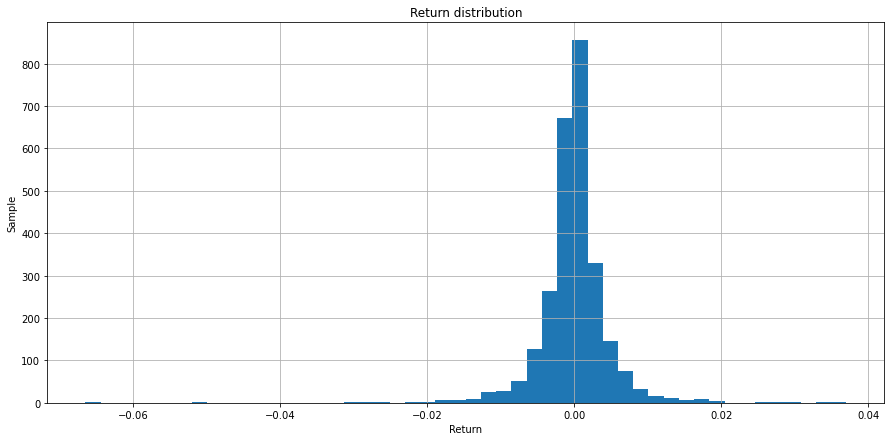

In [214]:
apple['<RETURN>'] = apple['<CLOSE>'].pct_change().fillna(method='bfill')

%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
apple['<RETURN>'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('Return distribution')
plt.show()
